## Homework 2 Part 2 Task 1: PCA
We will use the Fashion-MNIST dataset to build a PCA model. <br>
https://github.com/zalandoresearch/fashion-mnist <br>
Then, we will use the PCA model to <br>
(1) visualize the data in 2D <br>
(2) generate new images as a generative model <br>
This is a guided-task: <br>
You will see the output of a code cell and then figure out the code in that cell. <br>
In each code cell, there are instructions to help you. <br>
This is a very efficient and effective way to learn how to program with sk-learn

#### First, we load the dataset

In [234]:
# load the data, and it may take a while
from sklearn.datasets import fetch_openml
fasion_mnist=fetch_openml(name="Fashion-MNIST")

In [235]:
#contact TA or instructor if this cell does not work - mostly because you have old versions of some packages
try:
    data=fasion_mnist.data.values
except:
    data=fasion_mnist.data
#data should be numpy array
images=data.reshape(-1,28,28)
target=fasion_mnist.target.astype('int64')

In [236]:
#a row in data is an image (28x28 reshaped into a vector of 784 elements)
data.shape

(70000, 784)

In [237]:
# images[0] is the first image (28x28)
images.shape

(70000, 28, 28)

In [238]:
#an element in target is the class label of the corresponding image in data
target.shape

(70000,)

In [239]:
[target.min(), target.max()]

[0, 9]

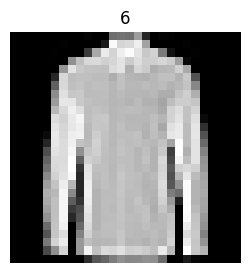

<Figure size 640x480 with 0 Axes>

In [240]:
# show some of the images
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, target.shape[0], 1000):
    x=data[n,:]
    x=x.reshape(28,28) # reshape a vector to an image
    ax.imshow(x, cmap='gray')
    ax.axis('off')
    ax.set_title(target[n])
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.1)

#### we need the function plot_components for visualization

In [241]:
from matplotlib import offsetbox
import numpy as np
def plot_components(data, model, images, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()

    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')

    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

### Your work begins here

In [292]:
#use IncrementalPCA (instead of original PCA) in sk-learn
#it runs faster to get the eigenvectors and eigenvalues
#it is more memory efficient
#the function 'fit' computes eigenvectors and eigenvalues
#use 'fit_transform' to do fit and forward transform together
from sklearn.decomposition import IncrementalPCA

pca = IncrementalPCA(n_components=2, whiten=False)

# Fit and transform the data
X = pca.fit_transform(data)

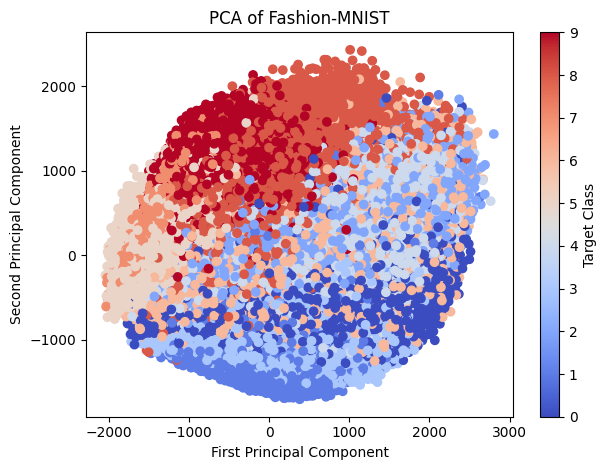

In [293]:
#show the data points in 2D
#you can find example code in my lecture notes (notebook files)
#you need to create a figure and axis:  fig, ax = plt.suplots()

fig, ax = plt.subplots()
scatter = ax.scatter(X[:, 0], X[:, 1], c=target, cmap=plt.cm.coolwarm)

# Information
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_title('PCA of Fashion-MNIST')
plt.colorbar(scatter, label='Target Class')

# Adjust the plot
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()


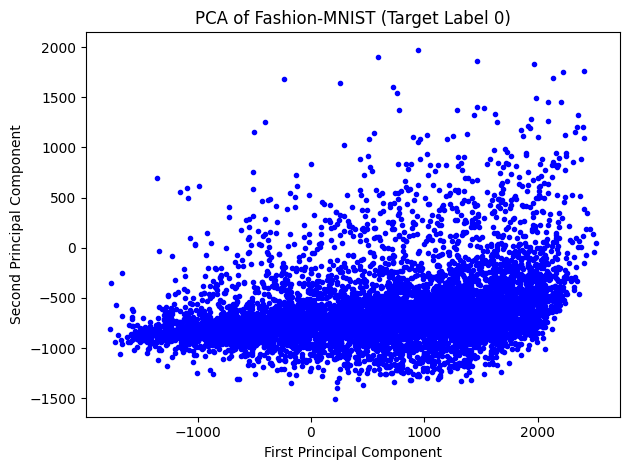

In [294]:
#show only the data points/images with class label=0 (i.e. target is 0) in 2D

mask = (target == 0)
data_0 = data[mask]

# Fit and transform the data with target label 0 using IncrementalPCA
X_0 = pca.fit_transform(data_0)


# Filter X_ipca for target == 0
X_label_0 = X[target == 0]

# Visualize using ax.scatter
fig, ax = plt.subplots()
ax.scatter(X_label_0[:, 0], X_label_0[:, 1], c='b', marker='.')

# Information
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_title('PCA of Fashion-MNIST (Target Label 0)')

plt.tight_layout()
plt.show()


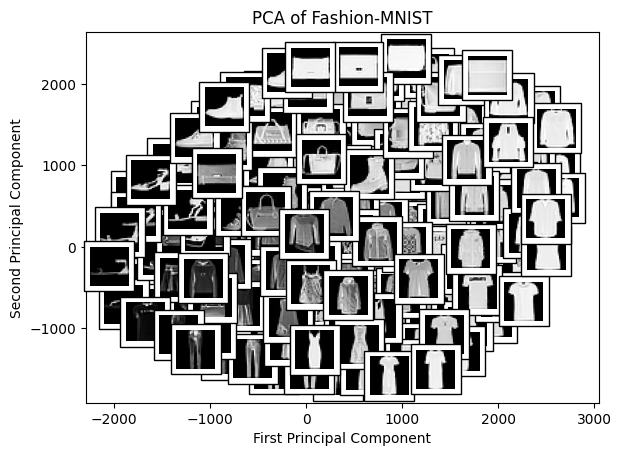

In [295]:
# Scale the data (whitening)
fig, ax = plt.subplots()
plot_components(X, model=pca, images=images, ax=ax, cmap='gray')

# Information
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_title('PCA of Fashion-MNIST')

plt.tight_layout()
plt.show()

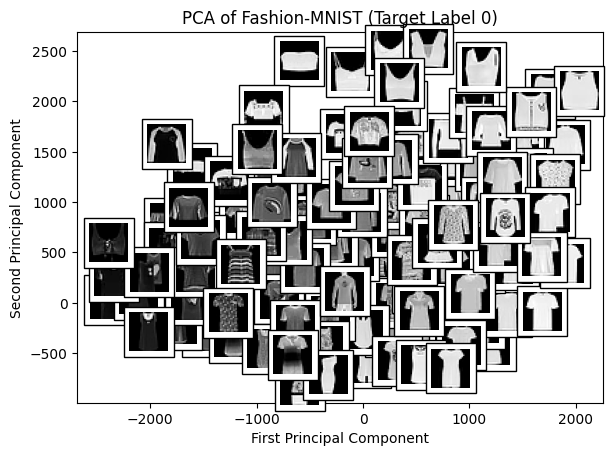

In [299]:
# use plot_components to show the data points with class label=0
# you may need something like this: data[target==0], images[target==0]
fig, ax = plt.subplots()
plot_components(X[target==0], model=pca, images=images[target==0], ax=ax, cmap='gray')

# Information
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_title('PCA of Fashion-MNIST (Target Label 0)')

plt.tight_layout()
plt.show()


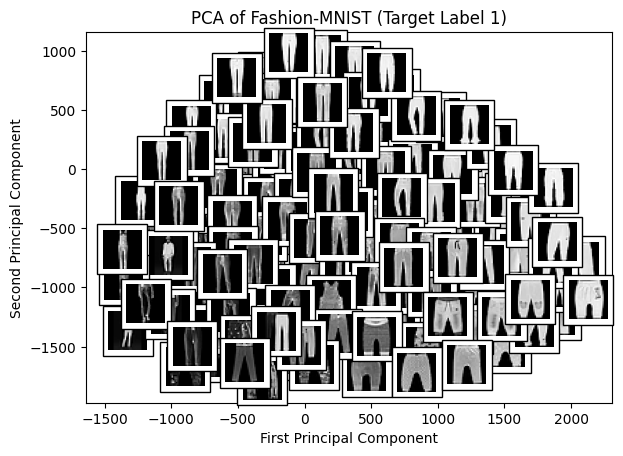

In [300]:
# use plot_components to show the data points with class label=1
# you may need something like this: data[target==1], images[target==1]
fig, ax = plt.subplots()
plot_components(data[target==1], model=pca, images=images[target==1], ax=ax, cmap='gray')

# Information
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_title('PCA of Fashion-MNIST (Target Label 1)')

plt.tight_layout()
plt.show()


From the above examples, we can see that PCA can extract meaningful features from the images

### 2. Use PCA to generate new images

First, we need to figure out how many components we need

In [304]:
#use IncrementalPCA (instead of original PCA) in sk-learn
#set n_components to a large number, e.g, 100
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import IncrementalPCA

# Perform PCA
n_components = 100
pca = IncrementalPCA(n_components=n_components, batch_size=None, copy=True, whiten=False)
data_transformed = pca.fit_transform(data)

print(pca.get_params())


{'batch_size': None, 'copy': True, 'n_components': 100, 'whiten': False}


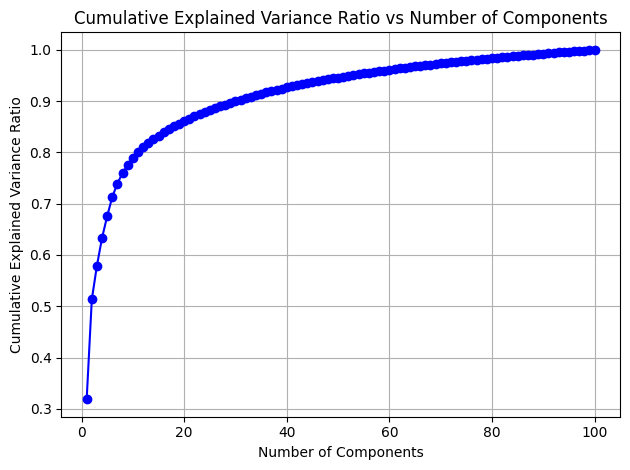

In [306]:
#plot the curve of 'percentage of variance explained' (0~1) vs n_components (0~100)
#apply np.cumsum on explained_variance_ratio_
# use plt.grid() to show grid
variences = pca.explained_variance_

total_varience = np.sum(variences)

varience_explaiend = variences/total_varience

cum_varience_explaiend = np.cumsum(varience_explaiend)


fig, ax = plt.subplots()
ax.plot(range(1, len(cum_varience_explaiend) + 1), cum_varience_explaiend, 'bo-')


# Information

ax.set_xlabel('Number of Components')
ax.set_ylabel('Cumulative Explained Variance Ratio')
ax.set_title('Cumulative Explained Variance Ratio vs Number of Components')
ax.grid(True)

plt.tight_layout()
plt.show()


In [308]:
# write code to find the smallest value of n_component such that
# (1) average reconstruction error is <= 20%
# (2) percentage of variance explained is >= 80%
# (3) cumulative explained variance ratio >= 80%
# (1), (2) and (3) are essentially the same, so you just use (3)
# you do not need to re-fit the model using this new value of n_component

target_error = 0.2
target_variance = 0.8
target_cum_variance = 0.8

variances = pca.explained_variance_
total_varience = np.sum(variances)
varience_explaiend = variences/total_varience
cum_varience_explaiend = np.cumsum(varience_explaiend)

n_componens = np.argmax((cum_varience_explaiend >= target_cum_variance) & (varience_explaiend >= target_variance))+ 1

print(f"Number of components to retain: {n_componens}")


Number of components to retain: 1


In [309]:
# get the mean, eigenvalues, and eigenvectors from the pca model
# assume that:
# the name of mean is mu
# the name of eigenvalues is v (a 1D array)
# the name of eigenvectors is w (a 2D array)

mu = pca.mean_
v = pca.explained_variance_
w = pca.components_


In [310]:
v.shape

(100,)

In [311]:
w.shape

(100, 784)

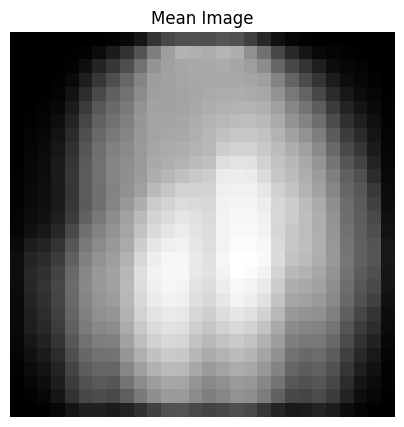

In [321]:
# plot the mean image from pca
# you need to reshape it to 28x28
plt.figure(figsize=(5, 5))
plt.imshow(mu.reshape(28, 28), cmap='gray')
plt.title('Mean Image')
plt.axis('off')
plt.show()


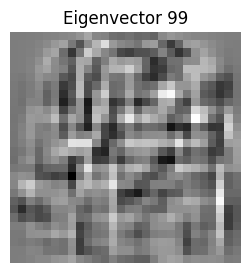

<Figure size 640x480 with 0 Axes>

In [322]:
# use a for loop to show the images of eigenvectors
# image is w[n].reshape(28,28)
# sample code:
# fig, ax = plt.subplots(figsize=(3, 3))
# for n in range(0, 100):
#     ax.imshow(w[n].reshape(28,28), cmap='gray')
#     ax.axis('off')
#     ax.set_title(n)
#     plt.draw()
#     display.clear_output(wait=True)
#     display.display(fig)
#     plt.pause(0.2)

fig, ax = plt.subplots(figsize=(3, 3))
for n in range(100):
    ax.imshow(w[n].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f'Eigenvector {n}')
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.2)

In [323]:
# L2 norm of an eigenvector w[0]
np.sum(w[0]**2)

1.0000000000000018

In [325]:
# generate a random number
3*np.random.randn()

3.3650063446901486

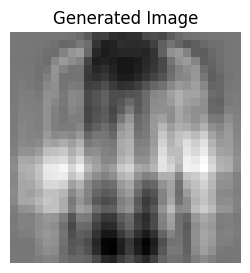

<Figure size 640x480 with 0 Axes>

In [326]:
# generate and show the new images
# use a for loop to geneate 100 new images
#     inside the for loop
#     x_new = mu + y[0]*sqrt(v[0])*w[0]+...+y[K]*sqrt(v[K])*w[K]
#     use a for loop to get X_new using the above equation
#     K is the number of components
#     y[k] is a random number generated using 3*np.random.randn()

fig, ax = plt.subplots(figsize=(3, 3))
for _ in range(100):
    x_new = mu.copy()
    for k in range(n_components):
        y = 3 * np.random.randn()
        x_new += y * np.sqrt(v[k]) * w[k]

    ax.imshow(x_new.reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title('Generated Image')
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.2)




PCA is not good at generating images. <br>
There is a better method based on neural networks.

### t-SNE for visualization

In [328]:
#select a subset of data points for TSNE
#because TSNE is very time-consuming
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Select a subset of data points for t-SNE
data_s = data[0::100]
target_s = target[0::100]
images_s = images[0::100]


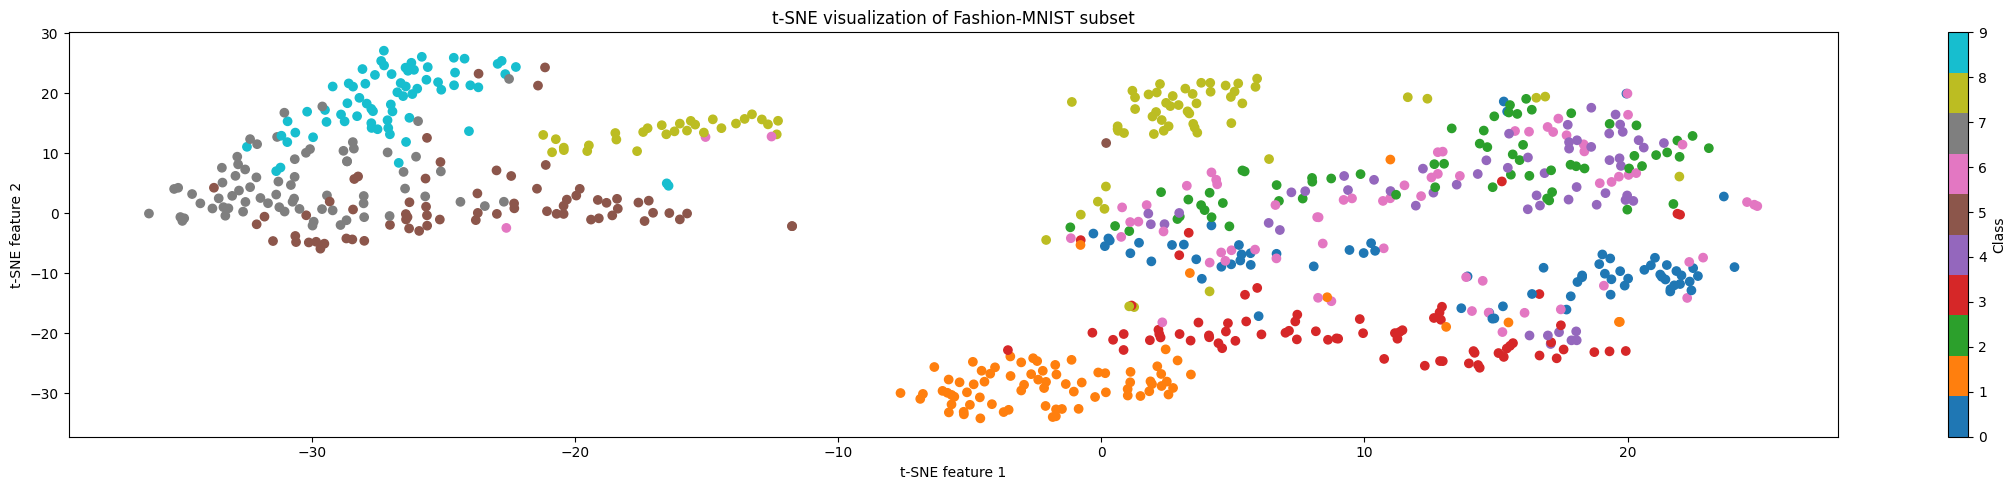

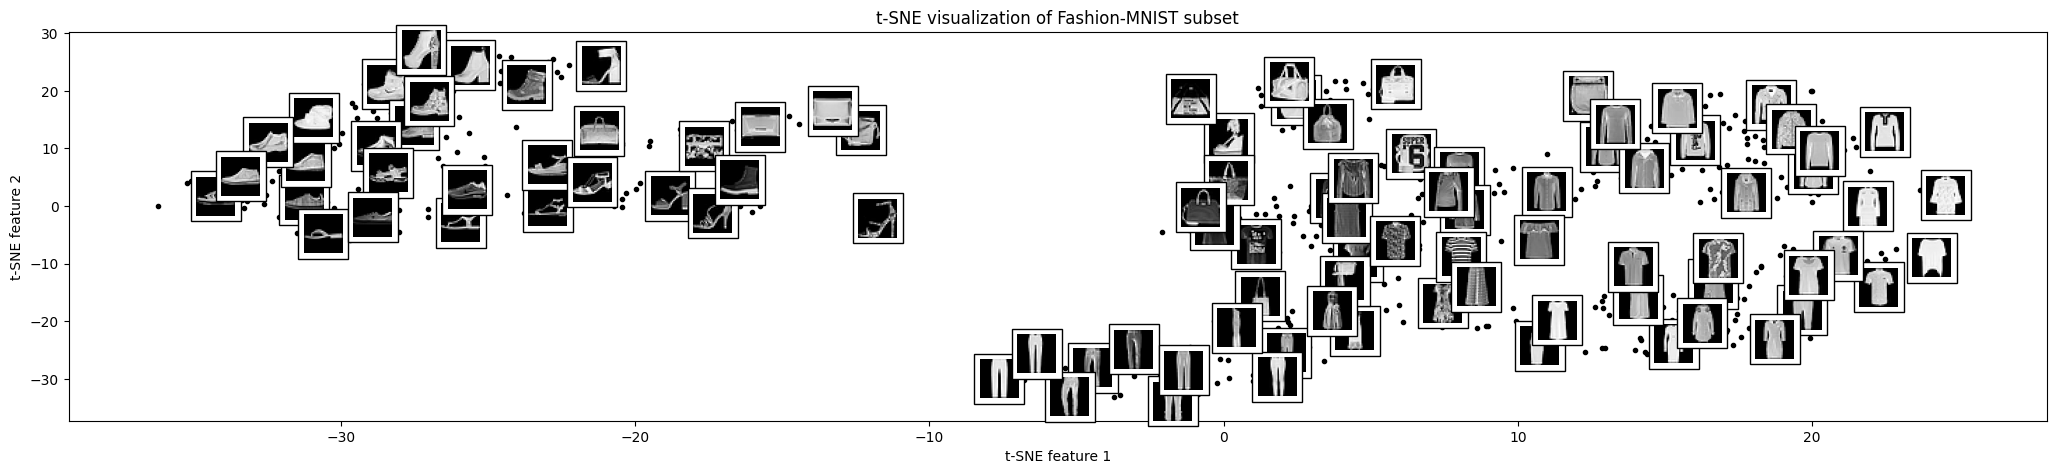

In [336]:
# run t-SNE on data_s and visualize the data in 2D using scatter plot

# Run t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(data_s)

# 1. Visualize the data in 2D using a scatter plot
plt.figure(figsize=(23, 5))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=target_s, cmap='tab10')
plt.colorbar(scatter, label='Class')

# Information
plt.title('t-SNE visualization of Fashion-MNIST subset')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')

plt.tight_layout()
plt.show()

# 2. Visualize with thumbnails using plot_components
fig, ax = plt.subplots(figsize=(23, 5))
plot_components(data_s, tsne, images_s, ax=ax)

# Information
ax.set_xlabel('t-SNE feature 1')
ax.set_ylabel('t-SNE feature 2')
ax.set_title('t-SNE visualization of Fashion-MNIST subset')

plt.tight_layout()
plt.show()
